<a href="https://colab.research.google.com/github/Abhishek92kumar/LJMU/blob/main/LayoutParser_table_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LayoutParser

A Python library for Document Image Analysis (DIA)

References:

Official Notebook
https://github.com/Layout-Parser/layout-parser/blob/master/examples/OCR%20Tables%20and%20Parse%20the%20Output.ipynb

Github repo
https://github.com/Layout-Parser/layout-parser

Research paper
https://arxiv.org/abs/2103.15348
https://arxiv.org/pdf/2103.15348.pdf


Dataset
https://arxiv.org/abs/2004.08686



install LayoutParser library from PyPi package and Tesseract OCR Engine. Install other dependencies.

In [1]:
%%bash
pip install -U layoutparser
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
pip install layoutparser[ocr]

sudo apt install tesseract-ocr
sudo apt install libtesseract-dev


  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-6wnmg0q5/detectron2_16dd9eda173a451183630c742cacc9e1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.35.0
    Uninstalling google-auth-1.35.0:
      Successfully uninstalled google-auth-1.35.0
  Using cached google_cloud_vision-1.0.0-py2.py3-none-any.whl (435 kB)
  Using cached google_api_core-1.34.1-py3-none-any.whl (120 kB)
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 0.1.4
    Uninstalling google-api-core-0.1.4:
      Successfully uninstalled google-api-core-0.1.4
  Attempting uninstall: google-cloud-vision
    Foun

  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-6wnmg0q5/detectron2_16dd9eda173a451183630c742cacc9e1
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 0.1.4 requires google-auth<2.0.0dev,>=0.4.0, but you have google-auth 2.28.1 which is incompatible.
google-api-python-client 2.84.0 requires google-api-core!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.0,<3.0.0dev,>=1.31.5, but you have google-api-core 0.1.4 which is incompatible.
google-cloud-aiplatform 1.42.1 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,<3.0.0dev,>=1.34.1, but you have google-api-core 0.1.4 which is incompatible.
google-cloud-bigquery 3.12.0 requires google-api-core[grpc]!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.

In [4]:
!pip install google-cloud-vision==0.29.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.7/71.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.2
    Uninstalling cachetools-5.3.2:
      Successfully uninstalled cachetools-5.3.2
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.34.1
    Uninstalling google-api-core-1.34.1:
      Successfully uninstalled google-api-core-1.34.1
  Attempting uninstall: google-cloud-vision
    Found existing installation: google-cloud-vision 1.0.0
    Uninstalling google-cloud-vision-1.0.0:
      Successfully uninstalled google-cloud-vision-1.0.0
ERROR: pip's depende

Import the libraries

In [2]:
import layoutparser as lp

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2

Clone the source files for example data

In [3]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


Change directory to read the example data

In [4]:
%cd /content/layout-parser/examples/data/
!ls -p

/content/layout-parser/examples/data
example-table.jpeg  paper-image.jpg


Read an image from the source files to infer on it

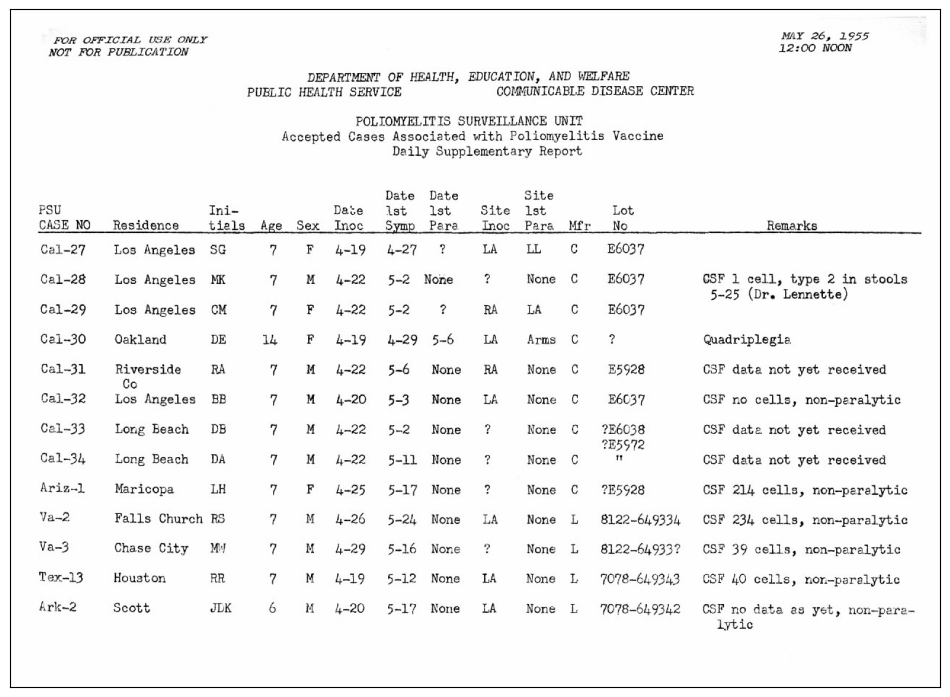

In [5]:
image = cv2.imread('example-table.jpeg')
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Load the TesseractAgent OCR Engine

In [6]:
model = lp.TesseractAgent()

Detect the texts and their locations from the sample image.

In [7]:
res = model.detect(image, return_response=True)

Collect texts and their bounding boxes details as a processible data structure.

In [8]:
ocr  = model.gather_data(res, lp.TesseractFeatureType(4))


In [9]:
ocr

Layout(_blocks=[TextBlock(block=Rectangle(x_1=0, y_1=0, x_2=1279, y_2=932), text=, id=0, type=None, parent=None, next=None, score=-1.0), TextBlock(block=Rectangle(x_1=60, y_1=38, x_2=180, y_2=48), text=, id=1, type=None, parent=None, next=None, score=-1.0), TextBlock(block=Rectangle(x_1=60, y_1=38, x_2=180, y_2=48), text=, id=2, type=None, parent=None, next=None, score=-1.0), TextBlock(block=Rectangle(x_1=60, y_1=38, x_2=180, y_2=48), text=, id=3, type=None, parent=None, next=None, score=-1.0), TextBlock(block=Rectangle(x_1=60, y_1=39, x_2=92, y_2=48), text=FOR, id=4, type=None, parent=None, next=None, score=94.0), TextBlock(block=Rectangle(x_1=101, y_1=38, x_2=180, y_2=48), text=OFFICIAL, id=5, type=None, parent=None, next=None, score=96.0), TextBlock(block=Rectangle(x_1=192, y_1=38, x_2=272, y_2=47), text=, id=6, type=None, parent=None, next=None, score=-1.0), TextBlock(block=Rectangle(x_1=192, y_1=38, x_2=272, y_2=47), text=, id=7, type=None, parent=None, next=None, score=-1.0), Tex

Display the image with texts along with their bounding boxes

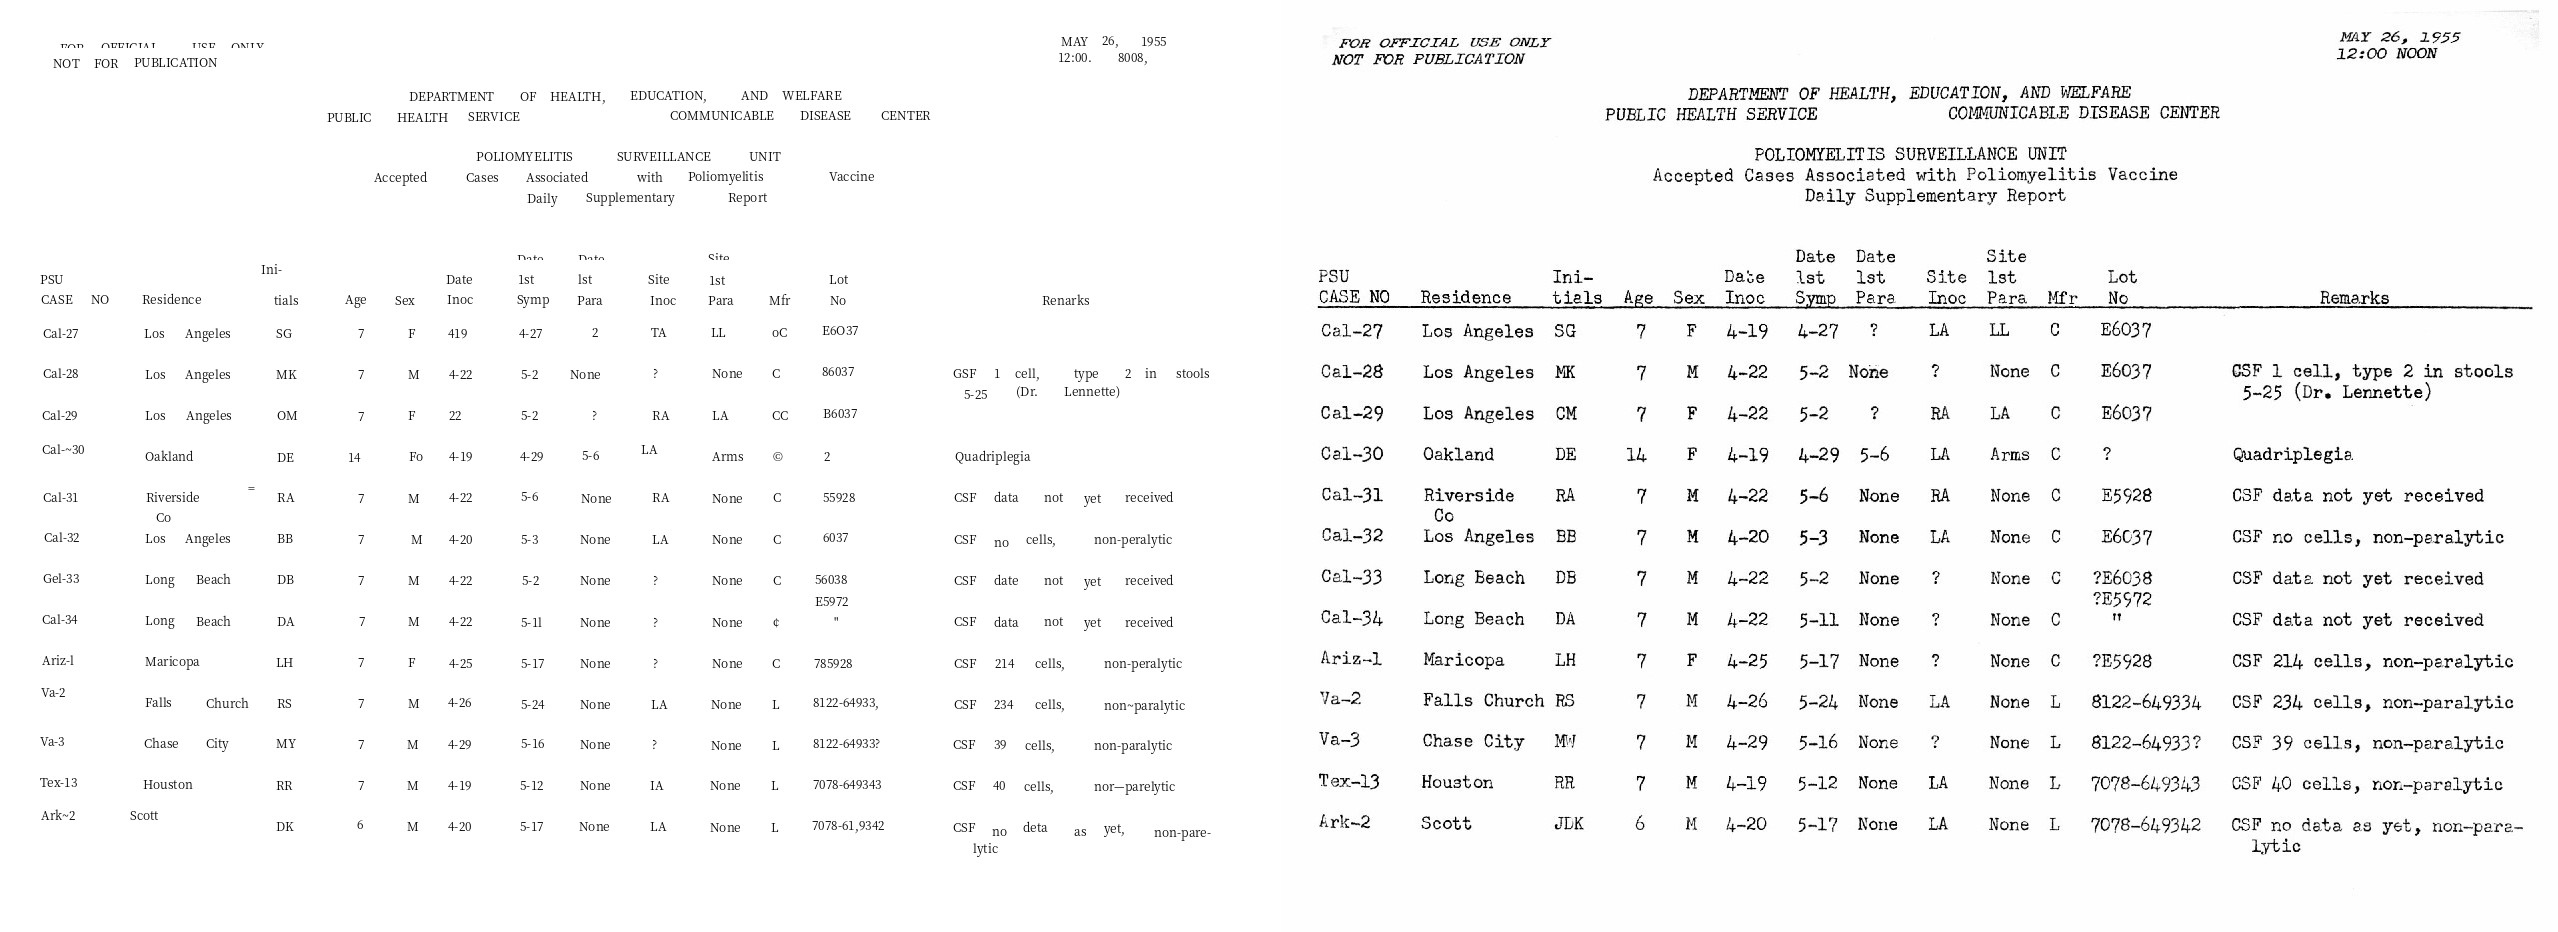

In [10]:
lp.draw_text(image, ocr, font_size=12, with_box_on_text=True,
             text_box_width=1)

We can recognize that the output texts are reproduced with Engine-specified fonts and sizes. Thus the system has recognized texts and their locations precisely. Further, we can post-process these texts in a column-wise manner or row-wise manner as per need.


Thank you for your time!